# 2. Creating the consort diagrams for the PulseOx dataset

## defines and imports

In [1]:
lower_SO2 = 70
upper_SO2 = 100
lenient_time_window = 90
strict_time_window = 5

In [2]:
# replace protean-chassis-368116 with your own project id
%env GOOGLE_CLOUD_PROJECT = protean-chassis-368116

env: GOOGLE_CLOUD_PROJECT=protean-chassis-368116


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from google.cloud import bigquery

import missingno as msno
import matplotlib.pyplot as plt

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

%load_ext google.colab.data_table

Authenticated


In [4]:
mimic_iv = {}
mimic_iii = {}
eicu = {}

In [5]:
consort_mimic_iv = {}
consort_mimic_iii = {}
consort_eicu = {}

## functions

In [6]:
def get_vars_df(sheet_id, gid):

  return pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}')

## patient demographics

### mimic-iv

In [7]:
%%bigquery mimic_iv_pat

SELECT DISTINCT
    icu.subject_id
  , icu.hadm_id
  , icu.stay_id
  , CASE WHEN icu.gender = "F" THEN 1 ELSE 0 END AS sex_female
  , icu.race AS race_ethnicity

-- ICU stays
FROM physionet-data.mimiciv_derived.icustay_detail
AS icu

Query is running:   0%|          |

Downloading:   0%|          |

In [8]:
sheets_id = "1Hv_sOd0--6TPYiB3Crjdn_JrIhIazXXJc05mL4GefOU"
gid = "1877090341"

mimic_iv_map = get_vars_df(sheets_id, gid)

mapping_series = mimic_iv_map.set_index('original')['mapping']

# Map the 'race_ethnicity' column in the 'mimic_iv_pat' DataFrame
mimic_iv_pat['race_ethnicity'] = mimic_iv_pat['race_ethnicity'].map(mapping_series)


In [9]:
mimic_iv_pat = mimic_iv_pat.groupby('subject_id').first()

consort_mimic_iv['dist_original'] = pd.crosstab(mimic_iv_pat['race_ethnicity'],
                                                mimic_iv_pat['sex_female'],
                                                normalize=True) * 100

consort_mimic_iv['dist_original'] = consort_mimic_iv['dist_original'].round(2)

consort_mimic_iv['dist_original']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.09,0.08
Asian,1.64,1.31
Black,4.20,4.88
Hispanic OR Latino,1.98,1.51
More Than One Race,0.05,0.05
Native Hawaiian / Pacific Islander,0.10,0.06
Unknown,9.72,6.63
White,38.06,29.62


In [10]:
n = len(mimic_iv_pat)
print(n)
consort_mimic_iv['n_original'] = n

50920


### mimic-iii

In [11]:
%%bigquery mimic_iii_pat

SELECT DISTINCT
  icu.subject_id AS SUBJECT_ID
, icu.hadm_id
, icu.icustay_id
, CASE WHEN icu.gender = "F" THEN 1 ELSE 0 END AS sex_female
, icu.ethnicity AS race_ethnicity


-- ICU stays
FROM physionet-data.mimiciii_derived.icustay_detail
AS icu

Query is running:   0%|          |

Downloading:   0%|          |

In [12]:
sheets_id = "1Hv_sOd0--6TPYiB3Crjdn_JrIhIazXXJc05mL4GefOU"
gid = "541230090"

mimic_iii_map = get_vars_df(sheets_id, gid)

mapping_series = mimic_iii_map.set_index('original')['mapping']

# Map the 'race_ethnicity' column in the 'mimic_iv_pat' DataFrame
mimic_iii_pat['race_ethnicity'] = mimic_iii_pat['race_ethnicity'].map(mapping_series)
mimic_iii_pat['race_ethnicity'] = mimic_iii_pat['race_ethnicity'].fillna('Unknown')


In [13]:
mimic_iii_pat = mimic_iii_pat.groupby('SUBJECT_ID').first()

consort_mimic_iii['dist_original'] = pd.crosstab(mimic_iii_pat['race_ethnicity'],
                                                mimic_iii_pat['sex_female'],
                                                normalize=True) * 100

consort_mimic_iii['dist_original'] = consort_mimic_iii['dist_original'].round(2)

consort_mimic_iii['dist_original']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.06,0.05
Asian,2.03,1.59
Black,3.88,4.39
Hispanic OR Latino,2.13,1.43
More Than One Race,0.13,0.11
Native Hawaiian / Pacific Islander,0.02,0.02
Unknown,8.58,5.94
White,39.34,30.31


In [14]:
n = len(mimic_iii_pat)
print(n)
consort_mimic_iii['n_original'] = n

46428


### eicu-crd

In [15]:
%%bigquery eicu_pat

SELECT DISTINCT
  icu.uniquepid AS subject_id
, icu.patienthealthsystemstayid
, icu.patientunitstayid
, CASE WHEN pat.gender = "Female" THEN 1 ELSE 0 END AS sex_female
, pat.ethnicity AS race_ethnicity


FROM `physionet-data.eicu_crd_derived.icustay_detail`
AS icu

LEFT JOIN `physionet-data.eicu_crd.patient`
AS pat
ON pat.patientunitstayid = icu.patientunitstayid


Query is running:   0%|          |

Downloading:   0%|          |

In [16]:
sheets_id = "1Hv_sOd0--6TPYiB3Crjdn_JrIhIazXXJc05mL4GefOU"
gid = "622977158"

eicu_map = get_vars_df(sheets_id, gid)

mapping_series = eicu_map.set_index('original')['mapping']

eicu_pat['race_ethnicity'] = eicu_pat['race_ethnicity'].map(mapping_series)
eicu_pat['race_ethnicity'] = eicu_pat['race_ethnicity'].fillna('Unknown')


In [17]:
x = eicu_pat.groupby('subject_id').first()

consort_eicu['dist_original'] = pd.crosstab(x['race_ethnicity'],
                                            x['sex_female'],
                                            normalize=True) * 100

consort_eicu['dist_original'] = consort_eicu['dist_original'].round(2)

consort_eicu['dist_original']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.35,0.34
Asian,0.88,0.80
Black,5.41,5.11
Hispanic OR Latino,2.00,1.75
Unknown,3.53,2.52
White,41.87,35.42


In [18]:
n = len(x)
print(n)
consort_eicu['n_original'] = n

139367


## abgs

### mimic-iv

In [19]:
%%bigquery mimic_iv_abgs

SELECT *
FROM
(
  SELECT *
  FROM (
    SELECT subject_id, hadm_id, charttime, label, value
    FROM
    (
      -- subquery
        SELECT *
        FROM `physionet-data.mimiciv_hosp.labevents` le
        LEFT JOIN (
          SELECT itemid, label FROM `physionet-data.mimiciv_hosp.d_labitems`
        )  dle2 ON dle2.itemid = le.itemid
        WHERE le.itemid IN (
          SELECT itemid FROM `physionet-data.mimiciv_hosp.d_labitems` WHERE category = "Blood Gas"
          )
    )
  )
  PIVOT (
    ANY_VALUE(value)
    FOR label IN (
      "pH",
      "pCO2",
      "pO2",
      "Oxygen Saturation" as SaO2,
      "Carboxyhemoglobin",
      "Methemoglobin",
      "Specimen Type" as SpecimenType
      )
  )
) pivoted
WHERE
subject_id IS NOT NULL
AND
hadm_id IS NOT NULL
AND
pH IS NOT NULL
AND
pCO2 IS NOT NULL
AND
SaO2 IS NOT NULL
AND
SpecimenType IS NOT NULL
AND
SpecimenType IN ("ART.")
ORDER BY subject_id ASC,  hadm_id ASC, charttime ASC

Query is running:   0%|          |

Downloading:   0%|          |

In [20]:
len(mimic_iv_abgs)

97562

In [21]:
for col in ['charttime']:
  mimic_iv_abgs[col] = pd.to_datetime(mimic_iv_abgs[col], errors='coerce')

for col in ['subject_id', 'hadm_id',
            'pH','pCO2','pO2','SaO2'
            ]:
  mimic_iv_abgs[col] = pd.to_numeric(mimic_iv_abgs[col], errors='coerce', downcast = 'integer')

# filters to ensure all minimal ABG data (pH, pCO2, pO2, SaO2) are present
mimic_iv['abgs'] = mimic_iv_abgs[
    mimic_iv_abgs[[
        'subject_id', 'hadm_id', 'charttime',
        'pH', 'pCO2','pO2','SaO2']].notnull().all(axis=1)
]
print(
    'unique ABGs: ',
    len(mimic_iv['abgs'])
    )

unique ABGs:  85421


In [22]:
mimic_iv_pat_abgs = mimic_iv['abgs'].merge(mimic_iv_pat,
                                           on='subject_id',
                                           how='left')

print(
    'unique ABGs: ',
    len((mimic_iv_pat_abgs))
    )

unique ABGs:  85421


In [23]:
consort_mimic_iv['p_abgs'] = len(mimic_iv_pat_abgs)

In [24]:
mimic_iv_pat_abgs = mimic_iv_pat_abgs.groupby('subject_id').first()

consort_mimic_iv['dist_abgs'] = pd.crosstab(mimic_iv_pat_abgs['race_ethnicity'],
                                            mimic_iv_pat_abgs['sex_female'],
                                            normalize=True) * 100

consort_mimic_iv['dist_abgs'] = consort_mimic_iv['dist_abgs'].round(2)

consort_mimic_iv['dist_abgs']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.13,0.08
Asian,1.63,0.89
Black,3.58,3.80
Hispanic OR Latino,2.00,1.25
More Than One Race,0.07,0.03
Native Hawaiian / Pacific Islander,0.06,0.05
Unknown,10.42,6.22
White,44.02,25.78


In [25]:
n = len(mimic_iv_pat_abgs)
print(n)
consort_mimic_iv['n_abgs'] = n

17846


### mimic-iii

In [26]:
## with specimen type

%%bigquery mimic_iii_abgs

SELECT *
FROM
(
  -- subquery
    SELECT le.SUBJECT_ID, le.HADM_ID, le.CHARTTIME, dle2.LABEL, le.VALUE
    FROM `physionet-data.mimiciii_clinical.labevents` le
    LEFT JOIN (
      SELECT ITEMID, LABEL FROM `physionet-data.mimiciii_clinical.d_labitems` LIMIT 1000
    )  dle2 ON dle2.itemid = le.itemid
    WHERE le.itemid IN (
      SELECT itemid FROM `physionet-data.mimiciii_clinical.d_labitems` WHERE category IN ("Blood Gas", "BLOOD GAS") LIMIT 1000
      )

    ORDER BY SUBJECT_ID ASC, CHARTTIME ASC
)

PIVOT (
    ANY_VALUE(value) -- as avn
    FOR label IN (
      "pH",
      "pCO2",
      "pO2",
      "Oxygen Saturation" as SaO2,
      "Carboxyhemoglobin", "Methemoglobin",
      "SPECIMEN TYPE" as SpecimenType
      )
  ) pivoted

WHERE
HADM_ID IS NOT NULL
AND
SUBJECT_ID IS NOT NULL
AND
pH IS NOT NULL
AND
pCO2 IS NOT NULL
AND
pO2 IS NOT NULL
AND
SaO2 IS NOT NULL
AND
SpecimenType IS NOT NULL
AND
SpecimenType IN ("ART")

Query is running:   0%|          |

Downloading:   0%|          |

In [27]:
len(mimic_iii_abgs)

95550

In [28]:
for col in ['CHARTTIME']:
  mimic_iii_abgs[col] = pd.to_datetime(mimic_iii_abgs[col], errors='coerce')

for col in ['SUBJECT_ID', 'HADM_ID',
            # 'stay_id' -- doesn't exist for ABGs
            'pH', 'pCO2', 'pO2', 'SaO2'
            ]:
  mimic_iii_abgs[col] = pd.to_numeric(mimic_iii_abgs[col], errors='coerce', downcast = 'integer')


# filters to ensure all minimal ABG data (pH, pCO2, pO2, SaO2) are present
mimic_iii['abgs'] = mimic_iii_abgs[
    mimic_iii_abgs[[
        'SUBJECT_ID', 'HADM_ID', 'CHARTTIME',
        'pH', 'pCO2','pO2','SaO2']].notnull().all(axis=1)
]

print(
    'unique ABGs: ',
    len((mimic_iii['abgs']))
    )

mimic_iii['abgs'] = mimic_iii_abgs[
    mimic_iii_abgs['SaO2'].notnull()
    & mimic_iii_abgs['pH'].notnull()
    & mimic_iii_abgs['pO2'].notnull()
    ].copy() # require SaO2 and all



unique ABGs:  95509


In [29]:
mimic_iii_pat_abgs = mimic_iii['abgs'].merge(mimic_iii_pat,
                                             on='SUBJECT_ID',
                                             how='left')
print(
    'unique ABGs: ',
    len((mimic_iii_pat_abgs))
    )

unique ABGs:  95509


In [30]:
consort_mimic_iii['p_abgs'] = len(mimic_iii_pat_abgs)

In [31]:
mimic_iii_pat_abgs = mimic_iii_pat_abgs.groupby('SUBJECT_ID').first()

consort_mimic_iii['dist_abgs'] = pd.crosstab(mimic_iii_pat_abgs['race_ethnicity'],
                                            mimic_iii_pat_abgs['sex_female'],
                                            normalize=True) * 100

consort_mimic_iii['dist_abgs'] = consort_mimic_iii['dist_abgs'].round(2)

consort_mimic_iii['dist_abgs']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.03,0.04
Asian,1.03,0.76
Black,2.71,3.26
Hispanic OR Latino,1.51,0.91
More Than One Race,0.09,0.05
Native Hawaiian / Pacific Islander,0.02,0.02
Unknown,11.95,7.37
White,42.42,27.82


In [32]:
n = len(mimic_iii_pat_abgs)
print(n)
consort_mimic_iii['n_abgs'] = len(mimic_iii_pat_abgs)

13366


### eicu-crd

In [33]:
%%bigquery eicu_abgs

SELECT *
FROM `protean-chassis-368116.eicu1_pulseOx.eicu_abgs`

Query is running:   0%|          |

Downloading:   0%|          |

In [34]:
eicu['abgs'] = eicu_abgs

print(
    'unique ABGs: ',
    len((eicu['abgs']))
    )

unique ABGs:  307183


In [35]:
eicu_pat_abgs = eicu['abgs'].merge(eicu_pat.groupby(by='patientunitstayid').first(),
                                   on='patientunitstayid',
                                   how='left')
print(
    'unique ABGs: ',
    len((eicu_pat_abgs))
    )

unique ABGs:  307183


In [36]:
consort_eicu['p_abgs'] = len(eicu_pat_abgs)

In [37]:
x = eicu_pat_abgs.groupby('subject_id').first()

consort_eicu['dist_abgs'] = pd.crosstab(x['race_ethnicity'],
                                        x['sex_female'],
                                        normalize=True) * 100

consort_eicu['dist_abgs'] = consort_eicu['dist_abgs'].round(2)

consort_eicu['dist_abgs']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.43,0.37
Asian,0.87,0.73
Black,5.23,4.86
Hispanic OR Latino,2.46,2.12
Unknown,3.50,2.53
White,42.71,34.19


In [38]:
n = len(x)
print(n)
consort_eicu['n_abgs'] = n

54787


## pairs, lenient time window

### mimic-iv

In [39]:
%%bigquery mimic_iv_vitals

Select *
FROM (
----
  SELECT subject_id,hadm_id,stay_id, charttime, di2.label, valuenum
  FROM `physionet-data.mimiciv_icu.chartevents` ce
  LEFT JOIN `physionet-data.mimiciv_icu.d_items` di2 ON di2.itemid = ce.itemid
  WHERE ce.itemid IN (
    -- select temp, HR, BP, O2sat
      SELECT itemid
      FROM `physionet-data.mimiciv_icu.d_items` di
      WHERE (
          (linksto = 'chartevents')
          and
          di.category in ('Respiratory', 'Routine Vital Signs')
          and
          di.label in (
              'O2 saturation pulseoxymetry'
              )
          )
    )

  )
  PIVOT (
    avg(valuenum)
    FOR label IN (
            'O2 saturation pulseoxymetry'
      )

  )
ORDER BY subject_id ASC,  hadm_id ASC, charttime ASC

Query is running:   0%|          |

Downloading:   0%|          |

In [40]:
for col in ['charttime']:
  mimic_iv_vitals[col] = pd.to_datetime(mimic_iv_vitals[col], errors='coerce')

for col in ['subject_id', 'hadm_id', 'stay_id']:
  mimic_iv_vitals[col] = pd.to_numeric(mimic_iv_vitals[col], errors='coerce', downcast = 'integer')

mimic_iv['vitals'] = mimic_iv_vitals[
    # ensure there are identifiers
    mimic_iv_vitals[[
        'subject_id', 'hadm_id', 'charttime',
        ]].notnull().all(axis=1)
    # and at least one value in vitals
        &
            mimic_iv_vitals[[
            'O2 saturation pulseoxymetry'
        ]].notnull().any(axis=1)

]

mimic_iv['vitals'] = mimic_iv['vitals'].rename(columns={
    'O2 saturation pulseoxymetry':'SpO2',
})

mimic_iv['vitals_withSpO2'] = mimic_iv['vitals'][
    mimic_iv['vitals']['SpO2'].notnull()
].copy()

mimic_iv['vitals_withSpO2_SaO2'] = mimic_iv['vitals'][
    mimic_iv['vitals']['SpO2'].notnull()
    &
    # ensure vitals are just for patients with ABGs
    mimic_iv['vitals']['subject_id'].isin(mimic_iv['abgs']['subject_id'])
].copy()

In [41]:
mimic_iv['abgs'] = mimic_iv['abgs'].sort_values(by = [
      'charttime'
      ])
mimic_iv['vitals_withSpO2_SaO2'] = mimic_iv['vitals_withSpO2_SaO2'].sort_values(by = [
      'charttime'
    ])

mimic_iv_ABG_SpO2 = pd.merge_asof(
        left = mimic_iv['abgs'].rename(columns={'charttime':'charttime_abg'}),
        right = mimic_iv['vitals_withSpO2_SaO2'].rename(columns={'charttime':'charttime_vitals'}),
        left_by = 'hadm_id',
        right_by = 'hadm_id',
        left_on = 'charttime_abg',
        right_on = 'charttime_vitals',
        tolerance = pd.Timedelta(seconds = lenient_time_window * 60),
        direction = 'backward',
        suffixes = ('','_todrop'),
        allow_exact_matches = True
    )

mimic_iv_ABG_SpO2.drop(columns = [col for col in mimic_iv_ABG_SpO2.columns if '_todrop' in col], inplace=True)
mimic_iv_ABG_SpO2 = mimic_iv_ABG_SpO2[mimic_iv_ABG_SpO2['charttime_vitals'].notnull()]

cols = mimic_iv_ABG_SpO2.columns.tolist()
cols.insert(2, cols.pop(cols.index('stay_id')))
cols.insert(8, cols.pop(cols.index('SpO2')))
mimic_iv_ABG_SpO2 = mimic_iv_ABG_SpO2[cols]

mimic_iv_ABG_SpO2 = mimic_iv_ABG_SpO2.drop("SpecimenType", axis=1)
mimic_iv_ABG_SpO2['delta_SpO2'] =  (mimic_iv_ABG_SpO2['charttime_vitals'] - mimic_iv_ABG_SpO2['charttime_abg']) \
                                   .dt.total_seconds() / 60

mimic_iv_ABG_SpO2 = mimic_iv_ABG_SpO2.rename(columns={"charttime_abg": "SaO2_timestamp",
                                                      "charttime_vitals": "SpO2_timestamp",
                                                      })


with pd.option_context('display.max_columns',None):
  display(
    mimic_iv_ABG_SpO2.head(2)
  )

mimic_iv['SpO2_SaO2_pairs'] = mimic_iv_ABG_SpO2

del mimic_iv_ABG_SpO2

,subject_id,hadm_id,stay_id,SaO2_timestamp,pH,pCO2,pO2,SaO2,SpO2,Carboxyhemoglobin,Methemoglobin,SpO2_timestamp,delta_SpO2
17,18106347,24305596,30588857,2110-01-11 16:07:00,7.40,37.0,140.0,98.0,100.0,None,None,2110-01-11 16:00:00,-7.0
18,16284044,23864737,36817845,2110-01-13 14:42:00,7.32,37.0,133.0,98.0,100.0,None,None,2110-01-13 14:14:00,-28.0


In [42]:
mimic_iv_pairs_pats = mimic_iv['SpO2_SaO2_pairs'].merge(mimic_iv_pat,
                                                                   on="subject_id",
                                                                   how="left")

In [43]:
consort_mimic_iv['p_lenient_pairs'] = len(mimic_iv_pairs_pats)

In [44]:
x = mimic_iv_pairs_pats.groupby('subject_id').first()

consort_mimic_iv['dist_lenient_pairs'] = pd.crosstab(x['race_ethnicity'],
                                             x['sex_female'],
                                             normalize=True) * 100

consort_mimic_iv['dist_lenient_pairs'] = consort_mimic_iv['dist_lenient_pairs'].round(2)

consort_mimic_iv['dist_lenient_pairs']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.12,0.08
Asian,1.57,0.76
Black,3.37,3.44
Hispanic OR Latino,2.04,1.23
More Than One Race,0.07,0.02
Native Hawaiian / Pacific Islander,0.07,0.05
Unknown,11.27,6.42
White,45.21,24.28


In [45]:
n = len(x)
print(n)
consort_mimic_iv['n_lenient_pairs'] = n

13160


In [46]:
mimic_iv_pairs_pats.head(2)

,subject_id,hadm_id_x,stay_id_x,SaO2_timestamp,pH,pCO2,pO2,SaO2,SpO2,Carboxyhemoglobin,Methemoglobin,SpO2_timestamp,delta_SpO2,hadm_id_y,stay_id_y,sex_female,race_ethnicity
0,18106347,24305596,30588857,2110-01-11 16:07:00,7.40,37.0,140.0,98.0,100.0,None,None,2110-01-11 16:00:00,-7.0,24305596,30588857,1,White
1,16284044,23864737,36817845,2110-01-13 14:42:00,7.32,37.0,133.0,98.0,100.0,None,None,2110-01-13 14:14:00,-28.0,23864737,36817845,1,White


### mimic-iii

In [47]:
%%bigquery mimic_iii_vitals

-- open vitals and pivot
Select *
FROM (
----
  SELECT subject_id,hadm_id,icustay_id, charttime, di2.label, valuenum
  FROM `physionet-data.mimiciii_clinical.chartevents` ce
  LEFT JOIN `physionet-data.mimiciii_clinical.d_items` di2 ON di2.itemid = ce.itemid
  WHERE ce.itemid IN (
    -- select temp, HR, BP, O2sat
      SELECT itemid
      FROM `physionet-data.mimiciii_clinical.d_items` di
      WHERE (
          (linksto = 'chartevents')
          and
          di.category in ('Respiratory', 'Routine Vital Signs')
          and
          di.label in (
              'O2 saturation pulseoxymetry'
              )
          )
    )

----
  )
  PIVOT (
    avg(valuenum)
    FOR label IN (
            'O2 saturation pulseoxymetry'
      )

  )
ORDER BY subject_id ASC,  hadm_id ASC, charttime ASC

Query is running:   0%|          |

Downloading:   0%|          |

In [48]:
for col in ['charttime']:
  mimic_iii_vitals[col] = pd.to_datetime(mimic_iii_vitals[col], errors='coerce')

for col in ['subject_id', 'hadm_id', 'icustay_id']:
  mimic_iii_vitals[col] = pd.to_numeric(mimic_iii_vitals[col], errors='coerce', downcast = 'integer')

mimic_iii['vitals'] = mimic_iii_vitals[
    # ensure there are identifiers
    mimic_iii_vitals[[
        'subject_id', 'hadm_id', 'charttime',
        ]].notnull().all(axis=1)
    # and at least one value in vitals
        &
            mimic_iii_vitals[[
            'O2 saturation pulseoxymetry'
        ]].notnull().any(axis=1)

]

mimic_iii['vitals'] = mimic_iii['vitals'].rename(columns={
    'O2 saturation pulseoxymetry':'SpO2'
})

mimic_iii_vitals = mimic_iii_vitals.rename(columns={
    'O2 saturation pulseoxymetry':'SpO2'
})

mimic_iii['vitals'] = mimic_iii_vitals[
    mimic_iii_vitals['SpO2'].notnull()
  ]


In [49]:
mimic_iii['vitals_withSpO2_SaO2'] = mimic_iii['vitals'][
    mimic_iii['vitals']['SpO2'].notnull()
    &
    # ensure vitals are just for patients with ABGs
    mimic_iii['vitals']['subject_id'].isin(mimic_iii['abgs']['SUBJECT_ID'])
].copy()

mimic_iii['abgs'] = mimic_iii['abgs'].loc[mimic_iii['abgs']['HADM_ID'].notnull()]

mimic_iii_ABG_SpO2 = pd.merge_asof(
        left = mimic_iii['abgs'].sort_values(by=['CHARTTIME']).rename(columns={'CHARTTIME':'charttime_abg'}),
        right = mimic_iii['vitals_withSpO2_SaO2'].sort_values(by=['charttime']).rename(columns={'charttime':'charttime_vitals'}),
        left_by = 'HADM_ID',
        right_by = 'hadm_id',
        left_on = 'charttime_abg',
        right_on = 'charttime_vitals',
        tolerance = pd.Timedelta(seconds = lenient_time_window * 60),
        direction = 'backward',
        suffixes = ('','_todrop'),
        allow_exact_matches = True
    )

mimic_iii_ABG_SpO2.drop(columns = [col for col in mimic_iii_ABG_SpO2.columns if '_todrop' in col], inplace=True)
mimic_iii_ABG_SpO2 = mimic_iii_ABG_SpO2[mimic_iii_ABG_SpO2['charttime_vitals'].notnull()]

cols = mimic_iii_ABG_SpO2.columns.tolist()
cols.insert(2, cols.pop(cols.index('icustay_id')))
cols.insert(8, cols.pop(cols.index('SpO2')))
mimic_iii_ABG_SpO2 = mimic_iii_ABG_SpO2[cols]

mimic_iii_ABG_SpO2 = mimic_iii_ABG_SpO2.drop(["SpecimenType", "subject_id", "hadm_id"], axis=1)
mimic_iii_ABG_SpO2['delta_SpO2'] =  (mimic_iii_ABG_SpO2['charttime_vitals'] - mimic_iii_ABG_SpO2['charttime_abg']) \
                                   .dt.total_seconds() / 60

mimic_iii_ABG_SpO2 = mimic_iii_ABG_SpO2.rename(columns={"charttime_abg": "SaO2_timestamp",
                                                        "charttime_vitals": "SpO2_timestamp",
                                                        })

with pd.option_context('display.max_columns',None, 'display.max_rows',5):
  display(
    mimic_iii_ABG_SpO2.head(2)
  )

mimic_iii['SpO2_SaO2_pairs'] = mimic_iii_ABG_SpO2

del mimic_iii_ABG_SpO2

,SUBJECT_ID,HADM_ID,icustay_id,SaO2_timestamp,pH,pCO2,pO2,SaO2,SpO2,Carboxyhemoglobin,Methemoglobin,SpO2_timestamp,delta_SpO2
17,84585,182054,245641,2100-08-03 01:28:00,7.37,36.0,43.0,79.0,100.0,None,0,2100-08-03 01:15:00,-13.0
18,84585,182054,245641,2100-08-03 02:11:00,7.38,37.0,51.0,88.0,98.0,None,None,2100-08-03 02:00:00,-11.0


In [50]:
mimic_iii_pairs_pats = mimic_iii['SpO2_SaO2_pairs'].merge(mimic_iii_pat,
                                                                   on="icustay_id",
                                                                   how="left")

In [51]:
consort_mimic_iii['p_lenient_pairs'] = len(mimic_iii_pairs_pats)

In [52]:
x = mimic_iii_pairs_pats.groupby('SUBJECT_ID').first()


consort_mimic_iii['dist_lenient_pairs'] = pd.crosstab(x['race_ethnicity'],
                                                 x['sex_female'],
                                                 normalize=True) * 100

consort_mimic_iii['dist_lenient_pairs'] = consort_mimic_iii['dist_lenient_pairs'].round(2)

consort_mimic_iii['dist_lenient_pairs']

sex_female,0,1
race_ethnicity,,
Asian,1.25,0.70
Black,1.81,3.06
Hispanic OR Latino,1.74,1.39
More Than One Race,0.07,0.00
Unknown,6.62,3.20
White,48.33,31.82


In [53]:
n = len(x)
print(n)
consort_mimic_iii['n_lenient_pairs'] = n

1751


### eicu-crd

In [54]:
%%bigquery eicu_abgs_vitals

SELECT *
FROM (
  -- join ABGs to vitals and impose
  -- https://stackoverflow.com/questions/20136990/how-to-cross-join-in-big-query-using-intervals

  SELECT abgs.*,
    vitals.patientunitstayid as patientunitstayid_vitals,
    vitals.observationoffset,
    vitals.spo2,
  FROM `protean-chassis-368116.eicu1_pulseOx.eicu_abgs` abgs
  CROSS JOIN `protean-chassis-368116.eicu1_pulseOx.eicu_vitals_withSaO2` vitals
  WHERE
    abgs.patientunitstayid = vitals.patientunitstayid
    AND
    vitals.observationoffset <= (abgs.labresultoffset)
  ORDER BY
    abgs.patientunitstayid ASC,
    abgs.labresultoffset ASC,
    vitals.observationoffset ASC
  -- LIMIT 1000
) SaO2_SpO2
LEFT JOIN (
  SELECT DISTINCT patientunitstayid as patientunitstayid_patient, patienthealthsystemstayid
  FROM `physionet-data.eicu_crd.patient`
) patient ON patient.patientunitstayid_patient = SaO2_SpO2.patientunitstayid

WHERE TRUE
  # save last row in cross join
  QUALIFY ROW_NUMBER() OVER (
    PARTITION BY SaO2_SpO2.patientunitstayid, SaO2_SpO2.labresultoffset
    # PARTITION BY patient.patienthealthsystemstayid, SaO2_SpO2.labresultoffset
    ORDER BY SaO2_SpO2.observationoffset DESC) = 1

ORDER BY SaO2_SpO2.patientunitstayid, labresultoffset

Query is running:   0%|          |

Downloading:   0%|          |

In [55]:
eicu_abgs_vitals = eicu_abgs_vitals.loc[eicu_abgs_vitals.labresultoffset \
                                      - eicu_abgs_vitals.observationoffset \
                                     <= lenient_time_window ]

In [56]:
eicu_abgs_vitals = eicu_abgs_vitals.drop(["patientunitstayid_patient",
                                          "patientunitstayid_vitals",
                                          "labresultrevisedoffset"], axis=1)

eicu_abgs_vitals_first = eicu_abgs_vitals.rename(columns={"labresultoffset": "SaO2_offset",
                                                          "observationoffset": "SpO2_offset",
                                                          "paO2": "pO2",
                                                          "paCO2": "pCO2"
                                                          })

eicu_abgs_vitals_first['delta_SpO2'] =  (eicu_abgs_vitals_first['SpO2_offset'] - eicu_abgs_vitals_first['SaO2_offset'])

cols = eicu_abgs_vitals_first.columns.tolist()
eicu_abgs_vitals_first = eicu_abgs_vitals_first[cols]


eicu['SpO2_SaO2_pairs'] = eicu_abgs_vitals_first

del eicu_abgs_vitals_first

In [57]:
eicu['SpO2_SaO2_pairs'].head(2)

,patientunitstayid,SaO2_offset,pH,pCO2,pO2,SaO2,Carboxyhemoglobin,Methemoglobin,SpO2_offset,spo2,patienthealthsystemstayid,delta_SpO2
0,141233,24,7.34,33.0,337.0,99.0,0.2,0.3,21,100,128973,-3
1,141233,92,7.39,30.0,142.0,98.0,0.3,0.2,91,99,128973,-1


In [58]:
len(eicu['SpO2_SaO2_pairs'])

206152

In [59]:
eicu_pairs = eicu['SpO2_SaO2_pairs'].merge(eicu_pat.groupby(by='patientunitstayid').first(),
                                   on='patientunitstayid',
                                   how='left')
print(
    'unique pairs: ',
    len((eicu_pairs))
    )

unique pairs:  206152


In [60]:
consort_eicu['p_lenient_pairs'] = len(eicu_pairs)

In [61]:
x = eicu_pairs.groupby('subject_id').first()
consort_eicu['dist_lenient_pairs'] = pd.crosstab(x['race_ethnicity'],
                                                 x['sex_female'],
                                                 normalize=True) * 100

consort_eicu['dist_lenient_pairs'] = consort_eicu['dist_lenient_pairs'].round(2)

consort_eicu['dist_lenient_pairs']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.46,0.39
Asian,0.93,0.72
Black,5.26,4.74
Hispanic OR Latino,2.37,2.02
Unknown,3.61,2.56
White,43.07,33.87


In [62]:
n = len(x)
print(n)
consort_eicu['n_lenient_pairs'] = n

40758


## pairs, strict time window

### mimic-iv

In [63]:
mimic_iv_pairs_pats = mimic_iv_pairs_pats.loc[mimic_iv_pairs_pats.delta_SpO2 >= -strict_time_window]

In [64]:
consort_mimic_iv['p_strict_pairs'] = len(mimic_iv_pairs_pats)

In [65]:
x = mimic_iv_pairs_pats.groupby('subject_id').first()

consort_mimic_iv['dist_strict_pairs'] = pd.crosstab(x['race_ethnicity'],
                                             x['sex_female'],
                                             normalize=True) * 100

consort_mimic_iv['dist_strict_pairs'] = consort_mimic_iv['dist_strict_pairs'].round(2)

consort_mimic_iv['dist_strict_pairs']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.17,0.04
Asian,1.69,0.71
Black,3.68,3.07
Hispanic OR Latino,2.03,1.28
More Than One Race,0.04,0.02
Native Hawaiian / Pacific Islander,0.13,0.04
Unknown,11.29,6.23
White,45.74,23.85


In [66]:
n = len(x)
print(n)
consort_mimic_iv['n_strict_pairs'] = n

4784


### mimic-iii

In [67]:
mimic_iii_pairs_pats = mimic_iii_pairs_pats.loc[mimic_iii_pairs_pats.delta_SpO2 >= -strict_time_window]

In [68]:
consort_mimic_iii['p_strict_pairs'] = len(mimic_iii_pairs_pats)

In [69]:
x = mimic_iii_pairs_pats.groupby('SUBJECT_ID').first()

consort_mimic_iii['dist_strict_pairs'] = pd.crosstab(x['race_ethnicity'],
                                             x['sex_female'],
                                             normalize=True) * 100

consort_mimic_iii['dist_strict_pairs'] = consort_mimic_iii['dist_strict_pairs'].round(2)

consort_mimic_iii['dist_strict_pairs']

sex_female,0,1
race_ethnicity,,
Asian,1.04,1.39
Black,1.74,1.74
Hispanic OR Latino,1.39,1.22
Unknown,7.64,3.47
White,49.83,30.56


In [70]:
n = len(x)
print(n)
consort_mimic_iii['n_strict_pairs'] = n

731


### eicu-crd

In [71]:
eicu_pairs = eicu_pairs.loc[eicu_pairs.delta_SpO2 >= -strict_time_window]

In [72]:
consort_eicu['p_strict_pairs'] = len(eicu_pairs)

In [73]:
x = eicu_pairs.groupby('subject_id').first()

consort_eicu['dist_strict_pairs'] = pd.crosstab(x['race_ethnicity'],
                                             x['sex_female'],
                                             normalize=True) * 100

consort_eicu['dist_strict_pairs'] = consort_eicu['dist_strict_pairs'].round(2)

consort_eicu['dist_strict_pairs']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.46,0.39
Asian,0.93,0.70
Black,5.23,4.70
Hispanic OR Latino,2.39,2.02
Unknown,3.63,2.57
White,43.08,33.91


In [74]:
n = len(x)
print(n)
consort_eicu['n_strict_pairs'] = n

39731


## cut-offs

### mimic-iv

In [75]:
mimic_iv_pat_abgs_cut = mimic_iv_pairs_pats[
    (mimic_iv_pairs_pats['SaO2'] >= lower_SO2)
    &
    (mimic_iv_pairs_pats['SaO2'] <= upper_SO2)
    &
    (mimic_iv_pairs_pats['SpO2'] >= lower_SO2)
    &
    (mimic_iv_pairs_pats['SpO2'] <= upper_SO2)
].copy()

In [76]:
consort_mimic_iv['p_pairs_cut'] = len(mimic_iv_pat_abgs_cut)

In [77]:
x = mimic_iv_pat_abgs_cut.groupby('subject_id').first()

consort_mimic_iv['dist_pairs_cut'] = pd.crosstab(x['race_ethnicity'],
                                                 x['sex_female'],
                                                 normalize=True) * 100

consort_mimic_iv['dist_pairs_cut'] = consort_mimic_iv['dist_pairs_cut'].round(2)

consort_mimic_iv['dist_pairs_cut']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.17,0.04
Asian,1.70,0.69
Black,3.69,3.08
Hispanic OR Latino,2.03,1.28
More Than One Race,0.04,0.02
Native Hawaiian / Pacific Islander,0.13,0.04
Unknown,11.27,6.22
White,45.75,23.86


In [78]:
n = len(x)
print(n)
consort_mimic_iv['n_pairs_cut'] = n

4774


In [79]:
mimic_iv_pat_abgs_cut.head(2)

,subject_id,hadm_id_x,stay_id_x,SaO2_timestamp,pH,pCO2,pO2,SaO2,SpO2,Carboxyhemoglobin,Methemoglobin,SpO2_timestamp,delta_SpO2,hadm_id_y,stay_id_y,sex_female,race_ethnicity
2,16284044,23864737,36817845,2110-01-13 16:01:00,7.33,39.0,129.0,98.0,100.0,None,None,2110-01-13 16:00:00,-1.0,23864737,36817845,1,White
6,13201095,28453791,39953418,2110-01-19 20:53:00,7.50,27.0,140.0,98.0,99.0,None,None,2110-01-19 20:53:00,0.0,28453791,39953418,1,Unknown


### mimic-iii

In [80]:
mimic_iii_pat_abgs_cut = mimic_iii_pairs_pats[
    (mimic_iii_pairs_pats['SaO2'] >= lower_SO2)
    &
    (mimic_iii_pairs_pats['SaO2'] <= upper_SO2)
    &
    (mimic_iii_pairs_pats['SpO2'] >= lower_SO2)
    &
    (mimic_iii_pairs_pats['SpO2'] <= upper_SO2)
].copy()

In [81]:
consort_mimic_iii['p_pairs_cut'] = len(mimic_iii_pat_abgs_cut)

In [82]:
x = mimic_iii_pat_abgs_cut.groupby('SUBJECT_ID').first()

consort_mimic_iii['dist_pairs_cut'] = pd.crosstab(x['race_ethnicity'],
                                                 x['sex_female'],
                                                 normalize=True) * 100

consort_mimic_iii['dist_pairs_cut'] = consort_mimic_iii['dist_pairs_cut'].round(2)

consort_mimic_iii['dist_pairs_cut']

sex_female,0,1
race_ethnicity,,
Asian,1.05,1.40
Black,1.75,1.75
Hispanic OR Latino,1.40,1.22
Unknown,7.50,3.49
White,49.91,30.54


In [83]:
n = len(x)
print(n)
consort_mimic_iii['n_pairs_cut'] = n

726


### eicu-crd

In [84]:
eicu_pat_abgs_cut = eicu_pairs[
    (eicu_pairs['SaO2'] >= lower_SO2)
    &
    (eicu_pairs['SaO2'] <= upper_SO2)
    &
    (eicu_pairs['spo2'] >= lower_SO2)
    &
    (eicu_pairs['spo2'] <= upper_SO2)
].copy()

In [85]:
eicu_pat_abgs_cut.head(2)

,patientunitstayid,SaO2_offset,pH,pCO2,pO2,SaO2,Carboxyhemoglobin,Methemoglobin,SpO2_offset,spo2,patienthealthsystemstayid_x,delta_SpO2,subject_id,patienthealthsystemstayid_y,sex_female,race_ethnicity
0,141233,24,7.34,33.0,337.0,99.0,0.2,0.3,21,100,128973,-3,002-8979,128973,1,White
1,141233,92,7.39,30.0,142.0,98.0,0.3,0.2,91,99,128973,-1,002-8979,128973,1,White


In [86]:
consort_eicu['p_pairs_cut'] = len(eicu_pat_abgs_cut)

In [87]:
x = eicu_pat_abgs_cut.groupby('subject_id').first()

consort_eicu['dist_pairs_cut'] = pd.crosstab(x['race_ethnicity'],
                                            x['sex_female'],
                                            normalize=True) * 100

consort_eicu['dist_pairs_cut'] = consort_eicu['dist_pairs_cut'].round(2)

consort_eicu['dist_pairs_cut']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.46,0.38
Asian,0.93,0.70
Black,5.23,4.70
Hispanic OR Latino,2.40,2.02
Unknown,3.62,2.57
White,43.08,33.90


In [88]:
n = len(x)
print(n)
consort_eicu['n_pairs_cut'] = n

39401


## first pairs

### mimic-iv

In [89]:
mimic_iv_first = mimic_iv_pat_abgs_cut.groupby(by = 'hadm_id_x').first().reset_index()

In [90]:
consort_mimic_iv['p_first_pairs'] = len(mimic_iv_first)

In [91]:
x = mimic_iv_first.groupby('subject_id').first()

consort_mimic_iv['dist_first_pairs'] = pd.crosstab(x['race_ethnicity'],
                                                   x['sex_female'],
                                                   normalize=True) * 100

consort_mimic_iv['dist_first_pairs'] = consort_mimic_iv['dist_first_pairs'].round(2)

consort_mimic_iv['dist_first_pairs']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.17,0.04
Asian,1.70,0.69
Black,3.69,3.08
Hispanic OR Latino,2.03,1.28
More Than One Race,0.04,0.02
Native Hawaiian / Pacific Islander,0.13,0.04
Unknown,11.27,6.22
White,45.75,23.86


In [92]:
n = len(x)
print(n)
consort_mimic_iv['n_pairs'] = n

4774


### mimic-iii

In [93]:
mimic_iii_first = mimic_iii_pat_abgs_cut.groupby(by = 'HADM_ID').first().reset_index()

In [94]:
consort_mimic_iii['p_first_pairs'] = len(mimic_iii_first)

In [95]:
x = mimic_iii_first.groupby('SUBJECT_ID').first()

consort_mimic_iii['dist_first_pairs'] = pd.crosstab(x['race_ethnicity'],
                                                    x['sex_female'],
                                                    normalize=True) * 100

consort_mimic_iii['dist_first_pairs'] = consort_mimic_iii['dist_first_pairs'].round(2)

consort_mimic_iii['dist_first_pairs']

sex_female,0,1
race_ethnicity,,
Asian,1.05,1.40
Black,1.75,1.75
Hispanic OR Latino,1.40,1.22
Unknown,7.50,3.49
White,49.91,30.54


In [96]:
n = len(x)
print(n)
consort_mimic_iii['n_first_pairs'] = n

726


### eicu-crd

In [97]:
eicu_first_pairs = eicu_pat_abgs_cut \
                        .sort_values(by=['patienthealthsystemstayid_x', 'SaO2_offset']) \
                        .groupby(by=['patienthealthsystemstayid_x']) \
                        .first().reset_index()


In [98]:
consort_eicu['p_first_pairs'] = len(eicu_first_pairs)
print(consort_eicu['p_first_pairs'])

43438


In [99]:
eicu_first_pairs.head(2)

,patienthealthsystemstayid_x,patientunitstayid,SaO2_offset,pH,pCO2,pO2,SaO2,Carboxyhemoglobin,Methemoglobin,SpO2_offset,spo2,delta_SpO2,subject_id,patienthealthsystemstayid_y,sex_female,race_ethnicity
0,128973,141233,24,7.34,33.0,337.0,99.0,0.2,0.3,21,100,-3,002-8979,128973,1,White
1,129157,141451,45,7.34,46.0,80.0,93.0,0.8,1.5,44,95,-1,002-65302,129157,0,Unknown


In [100]:
x = eicu_first_pairs.groupby('subject_id').first()
consort_eicu['dist_first_pairs'] = pd.crosstab(x['race_ethnicity'],
                                               x['sex_female'],
                                               normalize=True) * 100

consort_eicu['dist_first_pairs'] = consort_eicu['dist_first_pairs'].round(2)

consort_eicu['dist_first_pairs']

sex_female,0,1
race_ethnicity,,
American Indian / Alaska Native,0.46,0.38
Asian,0.93,0.70
Black,5.23,4.70
Hispanic OR Latino,2.40,2.02
Unknown,3.62,2.57
White,43.08,33.90


In [101]:
n = len(x)
print(n)
consort_eicu['n_first_pairs'] = n

39401


## finalize diagram

### N patient level

In [102]:
def print_n(db, consort, reg):
  print(db)
  filtered_keys = [key for key in consort.keys() if key.startswith(reg)]

  if filtered_keys:
      for key in filtered_keys:
          print(f"{key}: {consort[key]}")

In [103]:
print_n('mimic-iv', consort_mimic_iv, "n_")

mimic-iv
n_original: 50920
n_abgs: 17846
n_lenient_pairs: 13160
n_strict_pairs: 4784
n_pairs_cut: 4774
n_pairs: 4774


In [104]:
print_n('mimic-iii', consort_mimic_iii, "n_")

mimic-iii
n_original: 46428
n_abgs: 13366
n_lenient_pairs: 1751
n_strict_pairs: 731
n_pairs_cut: 726
n_first_pairs: 726


In [105]:
print_n('eicu', consort_eicu, "n_")

eicu
n_original: 139367
n_abgs: 54787
n_lenient_pairs: 40758
n_strict_pairs: 39731
n_pairs_cut: 39401
n_first_pairs: 39401


### N instance level

In [106]:
print_n('mimic-iv', consort_mimic_iv, "p_")

mimic-iv
p_abgs: 85421
p_lenient_pairs: 70543
p_strict_pairs: 9002
p_pairs_cut: 8963
p_first_pairs: 4917


In [107]:
print_n('mimic-iii', consort_mimic_iii, "p_")

mimic-iii
p_abgs: 95509
p_lenient_pairs: 8933
p_strict_pairs: 1287
p_pairs_cut: 1271
p_first_pairs: 738


In [108]:
print_n('eicu', consort_eicu, "p_")

eicu
p_abgs: 307183
p_lenient_pairs: 206152
p_strict_pairs: 196092
p_pairs_cut: 192850
p_first_pairs: 43438


### distribution demographics

In [109]:
def dist_names(db, consort):
  print(db)
  filtered_keys = [key for key in consort.keys() if key.startswith("dist_")]

  if filtered_keys:
      for key in filtered_keys:
          print(f"{key}")

In [110]:
dist_names('mimic-iv', consort_mimic_iv)

mimic-iv
dist_original
dist_abgs
dist_lenient_pairs
dist_strict_pairs
dist_pairs_cut
dist_first_pairs


In [111]:
dist_names('mimic-iii', consort_mimic_iii)

mimic-iii
dist_original
dist_abgs
dist_lenient_pairs
dist_strict_pairs
dist_pairs_cut
dist_first_pairs


In [112]:
dist_names('eicu', consort_eicu)

eicu
dist_original
dist_abgs
dist_lenient_pairs
dist_strict_pairs
dist_pairs_cut
dist_first_pairs


### plot dists

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

def demographics_heatmaps(consort_dict):

  # Subset the dictionary to get only items with keys starting with "dist_"
  dist_tables_dict = {key: value for key, value in consort_dict.items() if key.startswith("dist_")}

  # Combine the tables into a single DataFrame
  combined_df = pd.DataFrame()
  for key, table in dist_tables_dict.items():
      df = pd.DataFrame(table).fillna(0)
      combined_df = pd.concat([combined_df, df], axis=1, sort=False)

  # Plot the heatmaps in a vertical line with a common color bar
  num_heatmaps = len(dist_tables_dict)
  plt.figure(figsize=(1.5, 4 * num_heatmaps))  # Adjust the figure size based on the number of heatmaps

  for i, (key, table) in enumerate(dist_tables_dict.items(), start=1):
      plt.subplot(num_heatmaps, 1, i)
      ax = sns.heatmap(pd.DataFrame(table).fillna(0), annot=True, cmap='coolwarm', linewidths=1, cbar=False)
      ax.set_xticklabels(['Male', 'Female'], fontsize=8, va='center')
      # Remove x and y axis labels and title
      ax.set_xlabel("%")
      ax.set_ylabel("")
      ax.yaxis.set_tick_params(labelsize=8)

  plt.show()


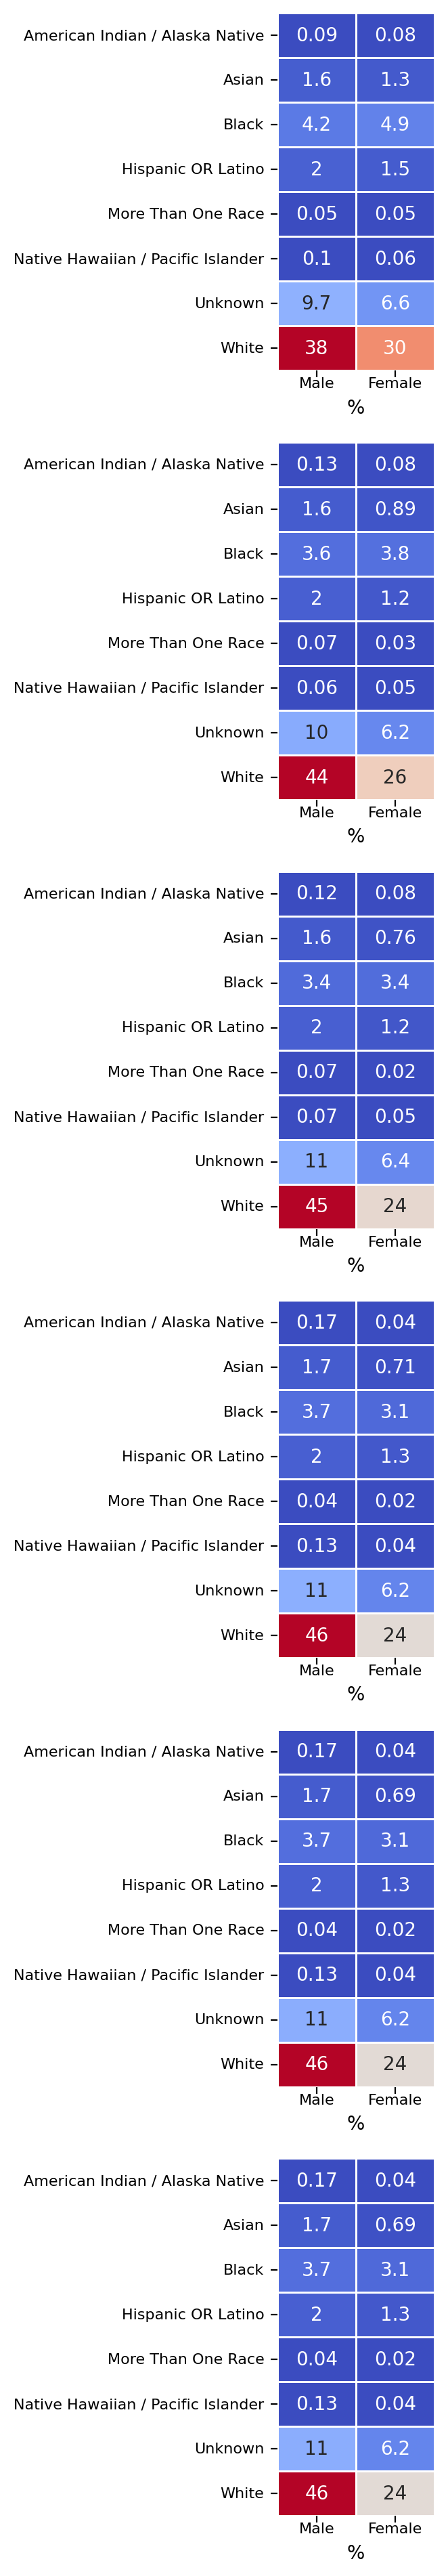

In [114]:
demographics_heatmaps(consort_mimic_iv)

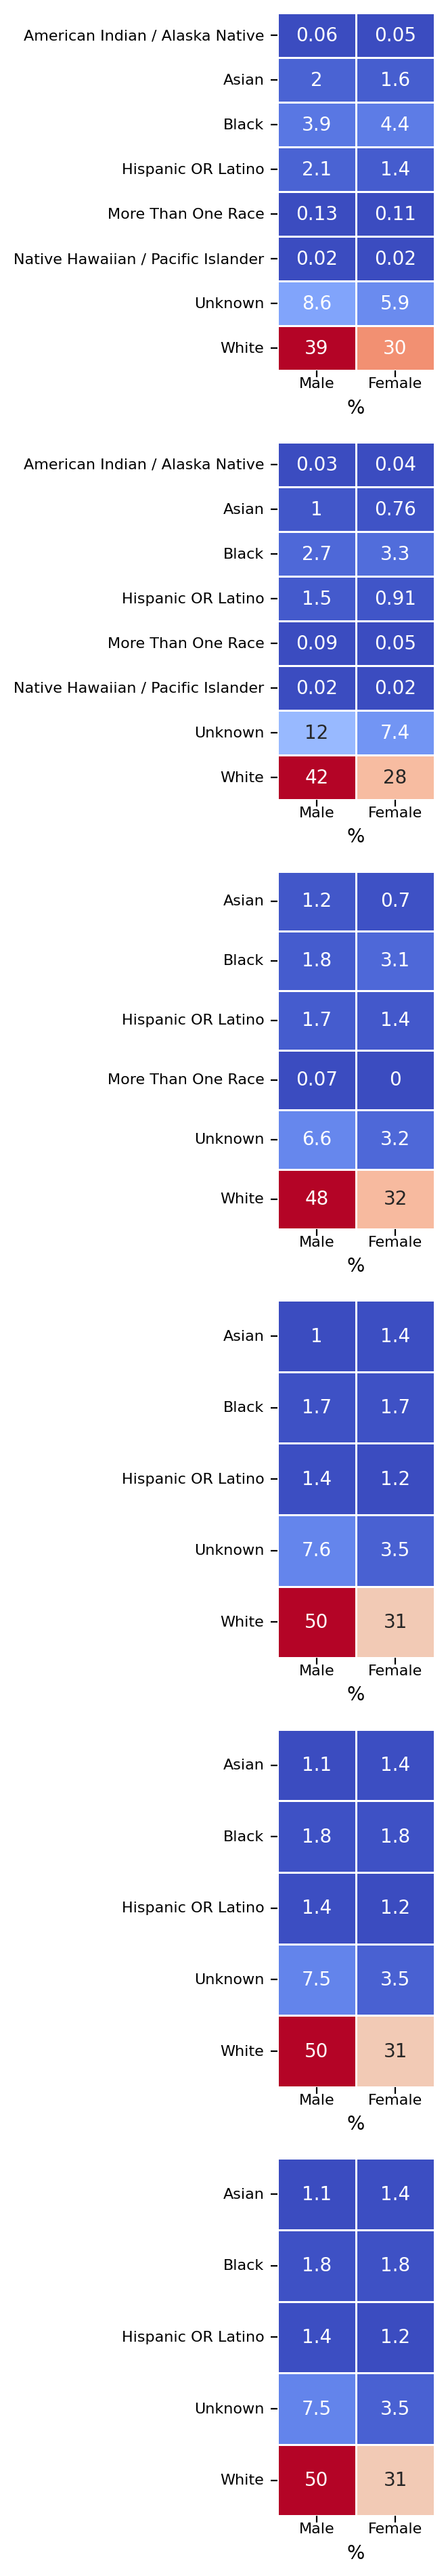

In [115]:
demographics_heatmaps(consort_mimic_iii)

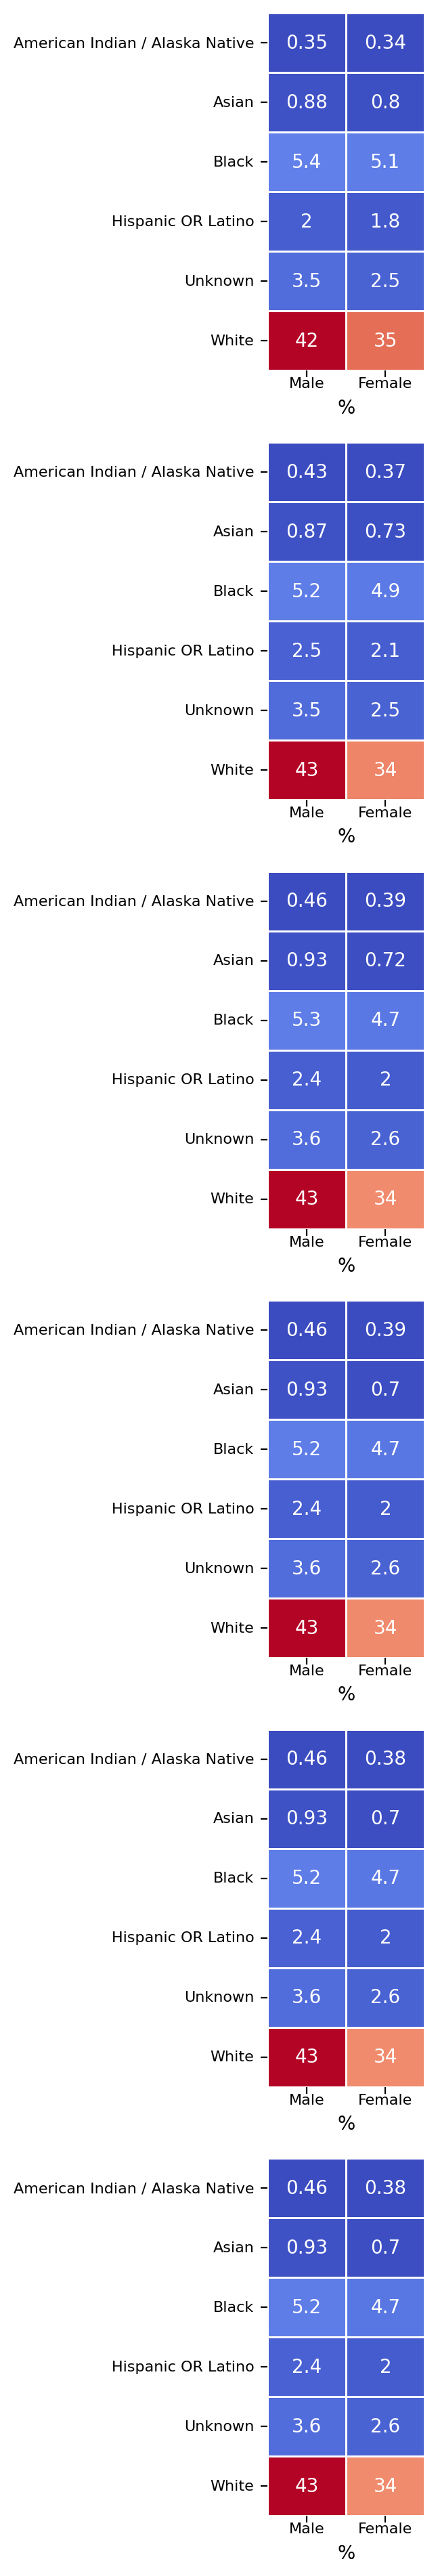

In [116]:
demographics_heatmaps(consort_eicu)